In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from tensorflow.keras.datasets import mnist
from itertools import combinations
from functools import reduce



In [16]:
# Converting to greyscale image into spins
def getspin(img,thresh=0):
    img = img/255
    img[img > thresh] = 1
    img[img <= thresh] = -1
    return img

# Calculate the energy of a configuration
"""
def Energy(Spins,Patterns):
    Np = len(Patterns)
    N = Spins.size
    Psum = 0
    for pattern in Patterns:
        Psum += np.tensordot(pattern,Spins)**2
    H = -(1/(2*N))*(Psum) + Np/2
    return H
"""


def Energy(Patterns,Spins):
    Np=len(Patterns)
    N=Patterns[0].size/2
    Q=np.zeros((Np, Np))
    for i in range(Np):
        for j in range(Np):
            Q[i,j]=(1/(2*N))*np.tensordot(Patterns[i],Patterns[j])
    Qinv=np.linalg.inv(Q)
    Weight=np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            for k in range(Np):
                for z in range(Np):
                    summ=Patterns[k][i]*Patterns[z][j]*Qinv(k,z)
            Weight[i,j]=summ/(2*N)
    Tot_energy=0
    for i in range(N):
        for j in range(N):
            energy=-0.5*Spins[i]*spins[j]*Weight(i,j)
        Tot_energy=Tot_energy+energy
    return Tot_energy    

""""
def Qinverse(Patterns):
    Q=numpy.zeros((Np, Np))
    for i in range Np:
        for j in range Np:
            Q(i,j)=np.tensordot(Patterns[i],Patterns[j])
    Qinv=np.linalg.inv(Q)        
    return Qinv

    
def Weight(Patterns)    
    Np=len(Patterns)
    N=Patterns[0].size/2
    Weight=np.zeros((N,N))
    for i in range N:
        for j in range N:
            for k in range Np:
                for z in range Np:
                    summ=Patterns[k][i]*Patterns[z][j]*Qinv(k,z)
        Weight(i,j)=summ/(2*N)
    
def Energy(Patterns,Spins)  
    Tot_energy=0
    for i in range(N):
        for j in range(N):
            energy=-0.5*Spins[i]*spins[j]*Weight(i,j)
        Tot_energy=Tot_energy+energy
"""   

    
# Monte carlo algorithm 
def hopfiled_sweep(Spins,Patterns,T):
    Ny,Nx = Spins.shape
    # Calculating The energy of the initial configuration 
    H = Energy(Spins,Patterns)
    # Performing 1 sweep 
    for k in range(Nx*Ny//2):
        # Choosing a spin to flip
        x = np.random.randint(Nx)
        y = np.random.randint(Ny)
        
        # Flipping said spin
        S_flip = Spins.copy()
        S_flip[y,x] = -Spins[y,x]
        
    
    
    
    
        # Calculating the new energy
        H_new = Energy(S_flip,Patterns)
        de = H_new - H
        # Deciding on whether to take the flip
        rand_value = rd.random()
        if de <= 0 :
            Spins = S_flip
            H = H_new
        elif rand_value <= np.exp(-de/T):
            Spins = S_flip
            H = H_new
    return [Spins,H]

# Hopfield Sweep updating
def Training(Spins,Patterns,T,sweeps=30):
    for i in range(sweeps):
        Snew,H = hopfiled_sweep(Spins,Patterns,T)
        Spins = Snew
    return Snew

# Visualisation 
def View(Patterns,Spins,Snew):
    fig, ax = plt.subplots(2,len(Patterns))
    for i,pattern in enumerate(Patterns):
        ax[0, i].imshow(pattern)
    ax[1,0].imshow(Spins)
    ax[1,1].imshow(Snew)

# Getiing the overlap
def overlap(Spins,Pattern):
    return abs(1/(Spins.size)*np.tensordot(Spins,Pattern))

# Adding noise 
def add_noise(Spins,prob):
    S = Spins.copy()
    num = int(S.size*prob)
    rand = np.arange(28)
    for i in range(num):
        randx = np.random.choice(rand)
        randy = np.random.choice(rand)
        S[randx,randy] = -S[randx,randy]
    return 

In [17]:
# Getting the MNIST dataset Patternsrom tensorflow datasets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Getting a number of patterns
P1 = getspin(X_train[9,:,:])
P2 = getspin(X_train[80,:,:])
P3 = getspin(X_train[23,:,:])
P4 = getspin(X_train[56,:,:])
P5 = getspin(X_train[57,:,:])
# List of patterns
Patterns = [P5,P3,P4]

#Random initialisation 
Spins = np.random.randint(2, size=(28,28))
Spins[Spins==0] = -1

#Spins = add_noise(P3,0.2)

Snew = Training(P3,Patterns,T=0.2,sweeps=50)
View(Patterns,P3,Snew)
plt.show()


# Generating overlap vs temp graphs 
"""
temps=np.arange(0.1,2,0.1)
mean_overlaps=np.zeros(len(temps))
for j,temp in enumerate(temps):
    overlaps = np.zeros(20)
    for i in range (20):
        Snew = Training(Spins,Patterns,T=temp)
        overlaps[i] = overlap(Snew,P1)
    mean_overlaps[j] = np.mean(overlaps)
plt.plot(temps,mean_overlaps)
plt.show()
"""

IndexError: tuple index out of range

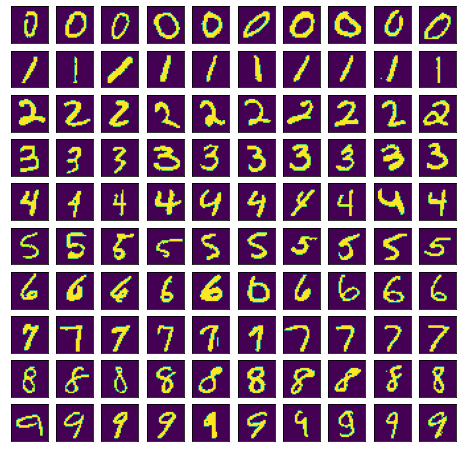

In [5]:
# Creating matrix of indices 
idxmat=np.zeros((10,10))
for i in range(10):
    idxmat[i,:] = np.random.choice(np.where(Y_train==i)[0],10)

# Plotting samples
fig, ax = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        P = getspin(X_train[int(idxmat[i,j]),:,:],thresh=0.3)
        ax[i,j].imshow(P)
        ax[i,j].set_xticks([]) 
        ax[i,j].set_yticks([])
plt.show()

In [36]:
P1 = getspin(X_train[9,:,:])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

In [1]:
from itertools import combinations 

In [6]:
comblist=[0,1,2]
comb=list(combinations(comblist,2))

In [7]:
comb

[(0, 1), (0, 2), (1, 2)]

In [ ]:
for i in len(comb)
        `

In [13]:
for i in range(4):
    for k in range(4):
        if i!=k and i<k:
            print(i,k)

0 1
0 2
0 3
1 2
1 3
2 3


In [6]:
np.tensordot(P5,P3)

array(584.)

<built-in method flatten of numpy.ndarray object at 0x00000201420E6E40>
